# Introduction

In the realm of competitive sports analytics, the strategic aggregation and analysis of player data have become central to identifying talent, devising game strategies, and scouting opponents. The FIFA20 dataset, a comprehensive compilation of player statistics from the popular FIFA video game series, serves as an ideal data source for such analytical endeavors. It encompasses a wide array of metrics, including physical attributes, skill ratings, and positional data for thousands of players, mirroring their real-life counterparts.

## The Problem

The problem at hand is to develop a methodological framework that allows for the identification of players with similar attributes and skill sets. This has practical applications in several areas, such as scouting for players with comparable qualities to a known star player, finding potential replacements for outgoing team members, or analyzing opposing teams for players with similar playing styles. The objective is to navigate through the rich dataset, apply unsupervised learning techniques, and establish a reliable, replicable system for player comparison.

## The Objective

This analysis aims to harness the data within the FIFA20 dataset to construct a model that can predict player similarities. By doing so, it seeks to provide sports analysts and team strategists with actionable insights, enabling them to make informed decisions based on data-driven evidence. The model will be evaluated on its ability to group players into meaningful clusters with KMeans clustering, and to identify the nearest neighbors to a given player based on various similarity metrics. The project will further explore the effectiveness of these methods, discuss their limitations, and suggest potential avenues for future research to refine and enhance the model's predictive power.

## Data Source

The dataset for this project was obtained from Kaggle: https://www.kaggle.com/datasets/stefanoleone992/fifa-20-complete-player-dataset/data

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring and Cleaning Data (EDA)

Let's load the dataset and see what can be used to find similar players.

In [3]:
fifa20_players = pd.read_csv('/kaggle/input/fifa-20-complete-player-dataset/players_20.csv')
fifa20_players.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  68+2  66+2   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        175         68      Brazil  Paris Saint-Germain  ...  66+3  61+3   
3        188         87    Slovenia      Atlético Madrid  ...   NaN   NaN   
4        175         74     Belgium          Real Madrid  ...  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3  

[5 rows x 104 columns]

In [4]:
fifa20_players.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 104 columns):
 #    Column                      Non-Null Count  Dtype  
---   ------                      --------------  -----  
 0    sofifa_id                   18278 non-null  int64  
 1    player_url                  18278 non-null  object 
 2    short_name                  18278 non-null  object 
 3    long_name                   18278 non-null  object 
 4    age                         18278 non-null  int64  
 5    dob                         18278 non-null  object 
 6    height_cm                   18278 non-null  int64  
 7    weight_kg                   18278 non-null  int64  
 8    nationality                 18278 non-null  object 
 9    club                        18278 non-null  object 
 10   overall                     18278 non-null  int64  
 11   potential                   18278 non-null  int64  
 12   value_eur                   18278 non-null  int64  
 13   wage_eur      

The FIFA20 dataset, consisting of 18,278 entries and 104 columns, offers a rich tableau of data points encapsulating a myriad of player attributes. While the dataset is comprehensive, there is a clear need for cleanup and preprocessing to ensure the accuracy and efficiency of subsequent analyses. Several columns have a significant number of null values, such as `player_tags`, `loaned_from`, `nation_position`, and goalkeeper-specific attributes, which are only applicable to a subset of players. Other columns, like `player_url`, `long_name`, and `dob`, may provide contextual information but are not directly relevant for statistical modeling.

In [5]:
fifa20_players['cm'].unique()

array(['87+2', '81+3', '82+3', nan, '83+3', '87+3', '74+3', '78+3',
       '65+3', '79+3', '62+3', '77+3', '79+5', '80+3', '84+3', '85+3',
       '76+3', '75+3', '67+3', '74+2', '82+2', '66+2', '72+3', '83+2',
       '70+3', '71+3', '69+3', '62+2', '81+2', '78+2', '58+2', '72+2',
       '84+2', '55+3', '74+4', '75+2', '80+2', '73+2', '68+3', '64+3',
       '60+3', '73+3', '79+2', '77+2', '65+2', '69+2', '64+2', '70+2',
       '71+2', '63+2', '76+2', '66+3', '60+2', '67+2', '61+3', '61+2',
       '57+2', '59+2', '68+2', '53+3', '63+3', '57+3', '54+2', '56+2',
       '53+2', '52+2', '55+2', '51+2', '58+3', '50+2', '47+2', '49+2',
       '48+2', '45+2', '43+2', '44+2', '46+2', '41+2', '42+2', '40+2',
       '39+2', '37+2', '38+2', '35+2', '36+2', '34+2', '33+2', '31+2',
       '32+2'], dtype=object)

Additionally, positional attributes, including `cm`, `ls`, `st`, `rs`, `lw`, `lf`, and others, are object types due to the presence of strings representing player ratings in different positions. These need to be converted into a numerical format to be usable for machine learning algorithms.

Also, the analysis doesn't really need the player's specific position of play but rather only their attributes. So, the player positions will be combined to specific area of operation (for example, `lw` and `rw` operate in the `wing`). This helps in reducing the dimensionality of the data.

In [6]:
position_cols = ['lw', 'rw', 'ls', 'st', 'rs', 'lf', 'cf', 'rf', 'lam', 'cam', 'ram', 'lcm', 'cm', 'rcm', 'lm', 'rm', 'ldm', 'cdm', 'rdm', 'lwb', 'rwb', 'lb', 'rb', 'lcb', 'cb', 'rcb']

def convert_position_rating(rating):
    if pd.isna(rating):
        return None
    else:
        parts = rating.split('+')
        return int(parts[0]) + int(parts[1])
    
for col in position_cols:
    fifa20_players[col] = fifa20_players[col].apply(convert_position_rating)

# Combine positions into broader categories
fifa20_players['wing'] = fifa20_players[['lw', 'rw']].mean(axis=1)
fifa20_players['forward'] = fifa20_players[['ls', 'st', 'rs', 'lf', 'cf', 'rf']].mean(axis=1)
fifa20_players['attacking_midfield'] = fifa20_players[['lam', 'cam', 'ram']].mean(axis=1)
fifa20_players['midfield'] = fifa20_players[['lcm', 'cm', 'rcm']].mean(axis=1)
fifa20_players['wide_midfield'] = fifa20_players[['lm', 'rm']].mean(axis=1)
fifa20_players['defensive_midfield'] = fifa20_players[['ldm', 'cdm', 'rdm']].mean(axis=1)
fifa20_players['full_back'] = fifa20_players[['lwb', 'rwb', 'lb', 'rb']].mean(axis=1)
fifa20_players['defense'] = fifa20_players[['lcb', 'cb', 'rcb']].mean(axis=1)

fifa20_players.drop(columns=position_cols, inplace=True)

Prior to delving into the analysis, it is crucial to streamline the dataset by selecting features that accurately represent the players' attributes. The FIFA20 dataset offers an extensive array of metrics, and the focus is on those that provide a holistic view of a player's profile.

**Basic Player Information:** Features such as age, height, and weight are foundational, as they can significantly influence performance. The inclusion of short_name and club provides identifiable information for subsequent qualitative assessments.

**Skill Ratings:** The comprehensive skill ratings available in the dataset, which cover everything from pace to dribbling, are indispensable for gauging a player's on-field capabilities.

**Mental and Defensive Attributes:** Attributes that reflect a player's mental fortitude and defensive prowess, such as aggression, interception, and composure, offer insights into aspects of gameplay that go beyond mere physical or skill-related metrics.

**Combined Position Ratings:** Combined positions based on area of operation from the previous cell.

In [7]:
relevant_features = [
    # Basic Player Information
    'age', 'height_cm', 'weight_kg', 'short_name', 'club',

    # Skill Ratings
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
    'attacking_short_passing', 'attacking_volleys', 
    'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
    'movement_reactions', 'movement_balance', 
    'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
    'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 
    'mentality_penalties', 'mentality_composure', 
    'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 
    'work_rate',

    # Combined Position Ratings
    'wing', 'forward', 'attacking_midfield', 'midfield', 'wide_midfield', 'defensive_midfield', 'full_back', 'defense'
]

df = fifa20_players[relevant_features]
df

age  height_cm  weight_kg         short_name  \
0       32        170         72           L. Messi   
1       34        187         83  Cristiano Ronaldo   
2       27        175         68          Neymar Jr   
3       26        188         87           J. Oblak   
4       28        175         74          E. Hazard   
...    ...        ...        ...                ...   
18273   22        186         79         Shao Shuai   
18274   22        177         66       Xiao Mingjie   
18275   19        186         75          Zhang Wei   
18276   18        185         74       Wang Haijian   
18277   26        182         78         Pan Ximing   

                                club  pace  shooting  passing  dribbling  \
0                       FC Barcelona  87.0      92.0     92.0       96.0   
1                           Juventus  90.0      93.0     82.0       89.0   
2                Paris Saint-Germain  91.0      85.0     87.0       95.0   
3                    Atlético Madrid   NaN       NaN      NaN        NaN   
4                        Real Madrid  91.0      83.0     86.0       94.0   
...                              ...   ...       ...      ...        ...   
18273               Beijing Renhe FC  57.0      23.0     28.0       33.0   
18274               Shanghai SIPG FC  58.0      24.0     33.0       35.0   
18275         Hebei China Fortune FC  54.0      35.0     44.0       45.0   
18276  Shanghai Greenland Shenhua FC  59.0      35.0     47.0       47.0   
18277         Hebei China Fortune FC  60.0      32.0     51.0       45.0   

       defending  ...  defending_sliding_tackle      work_rate  wing  forward  \
0           39.0  ...                        26     Medium/Low  95.0     93.0   
1           35.0  ...                        24       High/Low  92.0     93.5   
2           32.0  ...                        29    High/Medium  93.0     89.5   
3            NaN  ...                        18  Medium/Medium   NaN      NaN   
4           35.0  ...                        22    High/Medium  92.0     88.5   
...          ...  ...                       ...            ...   ...      ...   
18273       47.0  ...                        52    Medium/High  33.0     33.5   
18274       48.0  ...                        57  Medium/Medium  35.0     34.5   
18275       48.0  ...                        46     Low/Medium  45.0     45.0   
18276       45.0  ...                        54        Low/Low  47.0     45.5   
18277       47.0  ...                        48  Medium/Medium  46.0     44.5   

       attacking_midfield  midfield  wide_midfield  defensive_midfield  \
0                    95.0      89.0           94.0                68.0   
1                    91.0      84.0           91.0                64.0   
2                    93.0      85.0           92.0                64.0   
3                     NaN       NaN            NaN                 NaN   
4                    92.0      86.0           92.0                66.0   
...                   ...       ...            ...                 ...   
18273                33.0      35.0           35.0                44.0   
18274                35.0      38.0           37.0                45.0   
18275                46.0      48.0           47.0                51.0   
18276                48.0      48.0           48.0                50.0   
18277                48.0      48.0           48.0                51.0   

       full_back  defense  
0           67.5     54.0  
1           66.0     56.0  
2           66.5     49.0  
3            NaN      NaN  
4           66.5     52.0  
...          ...      ...  
18273       46.0     48.0  
18274       47.0     49.0  
18275       49.0     51.0  
18276       50.0     51.0  
18277       50.0     52.0  

[18278 rows x 49 columns]

In [8]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         18278 non-null  int64  
 1   height_cm                   18278 non-null  int64  
 2   weight_kg                   18278 non-null  int64  
 3   short_name                  18278 non-null  object 
 4   club                        18278 non-null  object 
 5   pace                        16242 non-null  float64
 6   shooting                    16242 non-null  float64
 7   passing                     16242 non-null  float64
 8   dribbling                   16242 non-null  float64
 9   defending                   16242 non-null  float64
 10  physic                      16242 non-null  float64
 11  attacking_crossing          18278 non-null  int64  
 12  attacking_finishing         18278 non-null  int64  
 13  attacking_heading_accuracy  182

Its apparent that a there are some values missing for attributes and the missing values are exactly of the count of goalkeepers. This means that only goalkeepers have missinng values for outfield attributes. Because of this and since the objective of this project is to find similar *outfield* players, all players with null values in crucial outfield attributes can be dropped (which will essentially drop all goalkeepers).

In [9]:
outfield_players = df.dropna(subset=['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'])
outfield_players.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 16242 entries, 0 to 18277
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         16242 non-null  int64  
 1   height_cm                   16242 non-null  int64  
 2   weight_kg                   16242 non-null  int64  
 3   short_name                  16242 non-null  object 
 4   club                        16242 non-null  object 
 5   pace                        16242 non-null  float64
 6   shooting                    16242 non-null  float64
 7   passing                     16242 non-null  float64
 8   dribbling                   16242 non-null  float64
 9   defending                   16242 non-null  float64
 10  physic                      16242 non-null  float64
 11  attacking_crossing          16242 non-null  int64  
 12  attacking_finishing         16242 non-null  int64  
 13  attacking_heading_accuracy  16242 no

In [10]:
outfield_players.describe().T

count        mean        std    min    25%  \
age                         16242.0   25.160017   4.544366   16.0   21.0   
height_cm                   16242.0  180.475249   6.454725  156.0  176.0   
weight_kg                   16242.0   74.438493   6.692058   50.0   70.0   
pace                        16242.0   67.700899  11.297656   24.0   61.0   
shooting                    16242.0   52.298301  14.029418   15.0   42.0   
passing                     16242.0   57.233777  10.407844   24.0   50.0   
dribbling                   16242.0   62.531585  10.284950   23.0   57.0   
defending                   16242.0   51.553503  16.419528   15.0   36.0   
physic                      16242.0   64.876678   9.760162   27.0   59.0   
attacking_crossing          16242.0   54.180766  14.044269   11.0   44.0   
attacking_finishing         16242.0   49.851188  16.340531   10.0   36.0   
attacking_heading_accuracy  16242.0   56.995382  11.638265   12.0   49.0   
attacking_short_passing     16242.0   62.728543   9.619125   23.0   57.0   
attacking_volleys           16242.0   46.674116  14.700085   10.0   35.0   
skill_dribbling             16242.0   60.856360  12.346669   16.0   55.0   
skill_curve                 16242.0   51.434491  15.094479   11.0   40.0   
skill_fk_accuracy           16242.0   46.282478  14.994287   10.0   34.0   
skill_long_passing          16242.0   56.136929  12.301053   19.0   48.0   
skill_ball_control          16242.0   63.322189   9.952176   24.0   58.0   
movement_acceleration       16242.0   67.635821  11.800788   20.0   61.0   
movement_sprint_speed       16242.0   67.742950  11.548859   25.0   62.0   
movement_agility            16242.0   66.478759  12.281811   23.0   59.0   
movement_reactions          16242.0   62.152198   8.807388   31.0   56.0   
movement_balance            16242.0   66.520256  12.174540   22.0   60.0   
power_shot_power            16242.0   59.644994  13.290262   14.0   51.0   
power_jumping               16242.0   65.876986  11.627546   25.0   59.0   
power_stamina               16242.0   66.993720  11.404695   29.0   60.0   
power_strength              16242.0   65.830378  12.568418   20.0   58.0   
power_long_shots            16242.0   51.147149  15.782163   11.0   39.0   
mentality_aggression        16242.0   59.475988  14.326789   10.0   50.0   
mentality_interceptions     16242.0   50.121229  18.856113   10.0   33.0   
mentality_positioning       16242.0   54.989780  14.582565   11.0   47.0   
mentality_vision            16242.0   55.558490  12.819629   12.0   47.0   
mentality_penalties         16242.0   51.998338  12.437148   11.0   42.0   
mentality_composure         16242.0   60.460781  10.212126   27.0   53.0   
defending_marking           16242.0   50.879571  17.443311   10.0   36.0   
defending_standing_tackle   16242.0   51.863995  19.047749   10.0   35.0   
defending_sliding_tackle    16242.0   49.590445  19.046176   10.0   32.0   
wing                        16242.0   61.105036   9.882466   27.0   55.0   
forward                     16242.0   60.327669   9.456421   30.5   54.0   
attacking_midfield          16242.0   61.069388   9.765853   29.0   55.0   
midfield                    16242.0   60.261852   8.833362   33.0   54.0   
wide_midfield               16242.0   61.784694   9.253605   29.0   56.0   
defensive_midfield          16242.0   58.752555  10.180389   30.0   51.0   
full_back                   16242.0   59.053442   9.292749   32.0   52.5   
defense                     16242.0   57.494767  11.793411   28.0   48.0   

                              50%    75%    max  
age                          25.0   28.0   42.0  
height_cm                   180.0  185.0  203.0  
weight_kg                    74.0   79.0  110.0  
pace                         69.0   75.0   96.0  
shooting                     54.0   63.0   93.0  
passing                      58.0   64.0   92.0  
dribbling                    64.0   69.0   96.0  
defending                    56.0   65.0   90.0  
physic 

The original data has been successfully distilled to defining attributes, reducing the feature set from 104 to a more manageable subset of 49 relevant features. Yet, this number still presents a challenge in terms of interpretability and visualization.

In [11]:
features_for_pairplot = ['age', 'pace', 'shooting', 'passing', 'dribbling', 
                         'defending', 'physic', 'attacking_crossing', 
                         'attacking_finishing', 'skill_dribbling', 
                         'height_cm', 'weight_kg', 'movement_balance']

plt.figure(figsize=(15, 15))
sns.pairplot(outfield_players[features_for_pairplot], diag_kind='kde')
plt.show()

<Figure size 1500x1500 with 0 Axes>

As observed in the pair plot, the interrelationships between features can be visually complex, with numerous scatter plots required to pairwise compare each feature. This matrix of plots provides a valuable overview of how different player attributes correlate with one another, revealing patterns and potential clusters within the data. However, the density of information can make it difficult to draw immediate, clear conclusions.

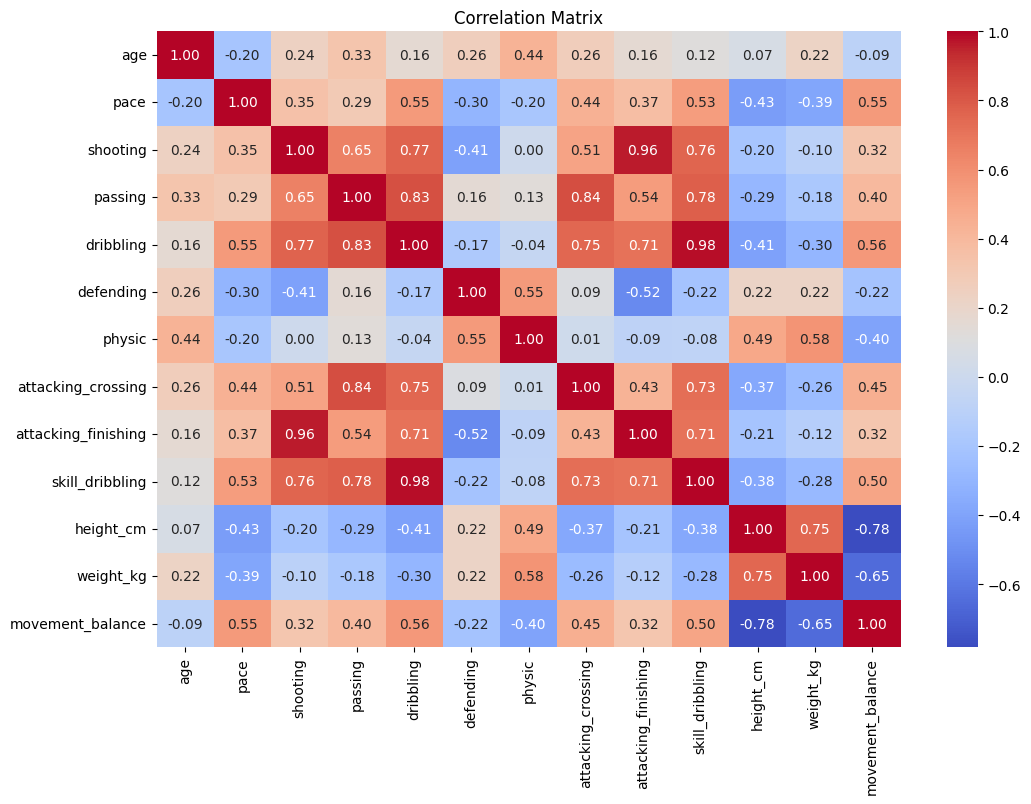

In [12]:
plt.figure(figsize=(12, 8))
corr_matrix = outfield_players[features_for_pairplot].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Positive correlations are notably present among shooting, passing, and dribbling skills, suggesting players often simultaneously excel in these areas. In contrast, a negative correlation between defensive attributes and offensive skills reflects the specialization between players' offensive and defensive roles. Age shows an inverse relationship with pace, indicating speed diminishes with advancing age, while a positive link with the physic attribute suggests physical strength may increase. Height and weight are positively correlated, which aligns with physical expectations, yet both show a negative relationship with balance, pointing to a compromise between size and agility.

Principal Component Analysis (PCA) is justified to reduce dimensionality, tackle multicollinearity, and improve the interpretability and visualization of the dataset. PCA will transform the dataset into a streamlined form, capturing the most significant features of player performance and allowing for more effective modeling.

In [13]:
from sklearn.preprocessing import StandardScaler

numerical_features = outfield_players.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
outfield_players_standardized = scaler.fit_transform(outfield_players[numerical_features])

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Keeping 95% of the variance
principal_components = pca.fit_transform(outfield_players_standardized)

pca_df = pd.DataFrame(data=principal_components, columns=['PC' + str(i) for i in range(1, pca.n_components_ + 1)])

original_shape = outfield_players_standardized.shape
transformed_shape = pca_df.shape

(original_shape, transformed_shape)

((16242, 46), (16242, 17))

It is observed that PCA has condensed the original feature set to **17 principal components** while retaining the components that explain 95% of the variance in the dataset. This reduced set of features should help to uncover patterns in the data more effectively and with less noise compared to the full set of original features.

# K-Means Clustering

K-Means Clustering was then utilized on this transformed dataset to partition players into distinct clusters. Each cluster theoretically represents players with similar attributes, as K-Means aims to minimize the within-cluster variance. The selection of the number of clusters, an important hyperparameter in K-Means, was informed by the Elbow method, which provided a data-driven approach to determining a suitable number for the dataset at hand.

In [15]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):  # Let's test for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.xticks(range(1, 11))
plt.show()

Based on the graph, the WCSS (Within-Cluster Sum of Square) values decrease rapidly up to a certain point, after which the rate of decrease slows down. This point, which appears to be around `k=4`, is where the elbow is typically considered to be located. At `k=4`, adding more clusters doesn't provide as significant a decrease in WCSS as the previous clusters did, suggesting diminishing returns on cluster quality.

Therefore, `k=4` would be a good starting point for the number of clusters

In [20]:
kmeans_optimal = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans_clusters_optimal = kmeans_optimal.fit_predict(pca_df)

# Adding the optimal cluster labels to the PCA DataFrame
pca_df['Optimal_KMeans_Cluster'] = kmeans_clusters_optimal

In [21]:
player_name = 'L. Messi'
player_index = outfield_players[outfield_players['short_name'] == player_name].index[0]
target_player_cluster = pca_df.loc[player_index, 'Optimal_KMeans_Cluster']

similar_player_indices = pca_df[pca_df['Optimal_KMeans_Cluster'] == target_player_cluster].index
similar_players = outfield_players.iloc[similar_player_indices]
similar_players = similar_players[similar_players['short_name'] != player_name]

print(f"Players similar to {player_name} based on KMeans clustering:")
similar_players[['short_name', 'age', 'club']]

Players similar to L. Messi based on KMeans clustering:


short_name  age                 club
1      Cristiano Ronaldo   34             Juventus
2              Neymar Jr   27  Paris Saint-Germain
4              E. Hazard   28          Real Madrid
5           K. De Bruyne   28      Manchester City
7            V. van Dijk   27            Liverpool
...                  ...  ...                  ...
13017      G. Cvijanović   32          Arka Gdynia
13024          K. Mensah   28           Brøndby IF
13028          S. Molina   27              Crotone
13029        L. Nizzetto   33       Virtus Entella
13865       Jo Jae Cheol   33         Gyeongnam FC

[4012 rows x 3 columns]

The model's objective is to minimize the variance within each cluster, resulting in a set of clusters that groups players by overall similarity in attributes. In the case of identifying players similar to Lionel Messi, KMeans clustering placed Messi in a broad cluster that included **4,012 players**. This wide net approach is advantageous for high-level segmentation and is computationally efficient for large datasets. However, it lacks the precision required for specific similarity comparisons because it does not account for the proximity of individual players to the target player but rather to the centroid of a cluster. This is particularly limiting when a nuanced and direct comparison is desired, as players within the same cluster may still exhibit considerable variation in their attributes.

# Nearest Neighbors

Let's proceed with applying the Nearest Neighbors algorithm to the PCA-reduced dataset to identify players with the closest proximity in the feature space to a given player. Unlike K-Means, which segments the entire dataset into broader groups, the Nearest Neighbors technique focuses on individual relationships, pinpointing the most similar players based on their feature vectors.

In [18]:
from sklearn.neighbors import NearestNeighbors

nn_model = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
nn_model.fit(pca_df.values)

NearestNeighbors(algorithm='ball_tree', n_neighbors=10)

In [19]:
# Finding players like Messi
player_name = 'L. Messi'
player_index = outfield_players.loc[outfield_players['short_name'] == player_name].index[0]
player_pca = pca_df.iloc[player_index].values.reshape(1, -1)

distances, indices = nn_model.kneighbors(player_pca)
similar_player_indices = indices.flatten()
similar_players = outfield_players.iloc[similar_player_indices]

print(f"Players similar to {player_name} based on NearestNeighbors:")
similar_players[['short_name', 'age', 'club']]

Players similar to L. Messi based on NearestNeighbors:


short_name  age                 club
0       L. Messi   32         FC Barcelona
4      E. Hazard   28          Real Madrid
2      Neymar Jr   27  Paris Saint-Germain
37       M. Reus   30    Borussia Dortmund
23     P. Dybala   25             Juventus
9       M. Salah   27            Liverpool
43        H. Son   26    Tottenham Hotspur
17     S. Agüero   31      Manchester City
22  A. Griezmann   28         FC Barcelona
66   A. Di María   31  Paris Saint-Germain

Unlike KMeans, Nearest Neighbors is not concerned with optimizing the overall structure but focuses on the local similarity, measuring the Euclidean distance from the target player to all others. This approach yielded a concise and highly relevant set of players deemed most similar to Messi, such as Eden Hazard and Neymar Jr. The strength of Nearest Neighbors lies in its ability to find the nearest subset of data points, making it inherently suitable for individual comparisons.

# Discussion and Comparison

KMeans clustering’s ability to partition the data into a pre-defined number of clusters is grounded in its objective to minimize within-cluster variance. This method is highly efficient for large datasets and is effective in segmenting data into distinct groups. However, its application in the context of finding a player similar to Messi resulted in a broad cluster comprising 4,012 players. This suggests that while KMeans is valuable for market segmentation or grouping players into general tiers, it falls short when precision is required. Its reliance on the mean structure often overlooks the nuances of individual data points, leading to clusters that may contain a diverse range of player attributes.

On the contrary, the Nearest Neighbors algorithm excels in precision. By calculating the Euclidean distance between data points, it identifies the closest players to the target player in the feature space. This specificity is advantageous when seeking a small subset of highly similar players. The resulting list, which included players like Eden Hazard and Neymar Jr., demonstrated a more discerning and relevant selection. Nonetheless, the model's computational intensity scales with the number of features and data points, potentially becoming prohibitive with high-dimensional data. This limitation was mitigated by pre-processing the data with PCA, thus enhancing the Nearest Neighbors algorithm's practicality.

The contrast between KMeans and Nearest Neighbors highlights the trade-off between breadth and precision. KMeans is more suitable for exploratory analysis where the goal is to understand the broader structure of the data. In contrast, Nearest Neighbors is tailored for targeted queries where specific comparisons are paramount. This distinction is critical when considering the application of each model. KMeans could be the model of choice for initial data exploration or when grouping attributes into broader categories, while Nearest Neighbors is preferred for personalized recommendations or detailed player analysis.

# Conclusion

The decision to employ KMeans or Nearest Neighbors should be dictated by the analytical objectives at hand. If the aim is to categorize players into general clusters for preliminary analysis, KMeans serves well. But when the task necessitates identifying players with the closest resemblance to a particular profile, Nearest Neighbors is the optimal choice, especially when pre-empted by PCA to reduce dimensionality and computational demands. This comparison underscores the importance of aligning model selection with specific analytical needs, balancing the scope of analysis with the granularity required for actionable insights.

## Limitations

The analysis of the FIFA20 dataset for player similarity encounters several limitations. 

1. KMeans clustering may not reflect the complex distributions of player attributes due to its assumption of spherical clusters. 
1. The Nearest Neighbors algorithm's effectiveness is contingent on the chosen distance metric and feature scale, which may not align with the significance of certain football skills. 
1. PCA, while reducing dimensionality, potentially discards important non-linear relationships and dynamic aspects of player performance. Furthermore, the static nature of the data fails to capture the temporal progression of players' abilities.
1. The dataset itself, sourced from a video game, may not encapsulate all elements of a player's real-life performance, such as psychological factors and fitness levels, which are crucial to their on-field impact. 

Future enhancements would benefit from addressing these limitations by incorporating more dynamic data and advanced analytical methods.

## Recommendations

For future enhancements of the player similarity model within the FIFA20 dataset, researchers could explore a variety of methods. Advanced feature engineering to include detailed performance metrics could offer a more nuanced player comparison. Optimizing clustering algorithms through hyperparameter tuning could refine the groupings for increased accuracy. Incorporating players' historical performance data would allow for a dynamic analysis that considers the evolution of a player's career. Validation of the model's results with football industry experts can ensure practical relevance and accuracy. Additionally, experimenting with sophisticated clustering algorithms and deep learning techniques may uncover complex patterns and relationships not immediately apparent through traditional methods, leading to a deeper understanding of player similarities and capabilities.